In [ ]:
# 1. Nhập dữ liệu và thống kê những thông tin cơ bản của các thuộc tính

In [1]:
# Cài đặt thư viện cần thiết

#linear algebra
import numpy as np

#data processing
import pandas as pd

#data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
# Đọc dữ liệu đầu vào
with open ('bank.csv') as f:
    df = pd.read_csv(f, sep=";")

In [3]:
# Xem dữ liệu đầu vào
df.head(12)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
# Thống kê chỉ số của các thuộc tính định lượng
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# 2. Liệt kê danh sách 5 thuộc tính có số lượng giá trị rỗng nhiều nhất

In [6]:
# Lấy ra 5 thuộc tính có tổng định lượng cao nhất
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0


In [ ]:
# --> Kết quả cho thấy dataset bank không có thuộc rỗng

In [ ]:
# 3. Vẽ biểu đồ khảo sát sự liên quan giữa thuộc tính Độ tuổi (age), Kết hôn (marital) và khả năng quyết định tham gia (y)

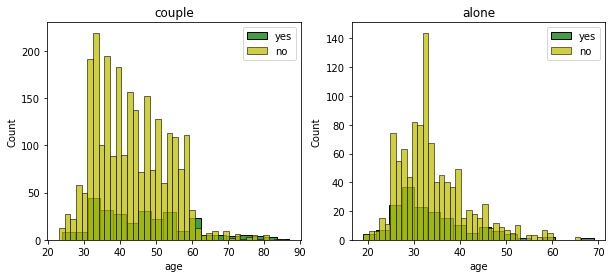

In [7]:
yes = 'yes'
no = 'no'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
couple = df[df['marital']=='married']
alone = df[df['marital']=='single']
couple

ax = sns.histplot(couple[couple['y']==yes].age.dropna(),bins=18, label=yes, ax=axes[0], kde=False, color='g')
ax = sns.histplot(couple[couple['y']==no].age.dropna(),bins=40, label=no, ax=axes[0], kde=False, color='y')
ax.legend()
ax.set_title('couple')
ax = sns.histplot(alone[alone['y']==yes].age.dropna(),bins=18, label=yes, ax=axes[1], kde=False, color='g')
ax = sns.histplot(alone[alone['y']==no].age.dropna(),bins=40, label=no, ax=axes[1], kde=False, color='y')
ax.legend()
_ = ax.set_title('alone')

In [ ]:
# --> Từ biểu đồ trên có thể rút ra vài nhận xét như sau:
# • Xác suất không đồng ý tham gia (no) là rất cao ở cả nam và nữ
# • Khả năng đồng ý tham gia (yes) của những người có gia đình tập trung ở tuổi 30 - 60
# • Khả năng đồng ý tham gia (no) của những người độc thân tập trung từ 25 - 40 tuổi

In [ ]:
# 4. Vẽ biểu đồ khảo sát sự liên quan giữa thuộc tính "Kết hôn" và công việc (job) với khả năng đồng ý (y)

In [9]:
# chuyển đổi giá trị thuộc tính "y" về (0,1)
dec = {"no": 0, "yes": 1}
df["d"] = df["y"].map(dec)

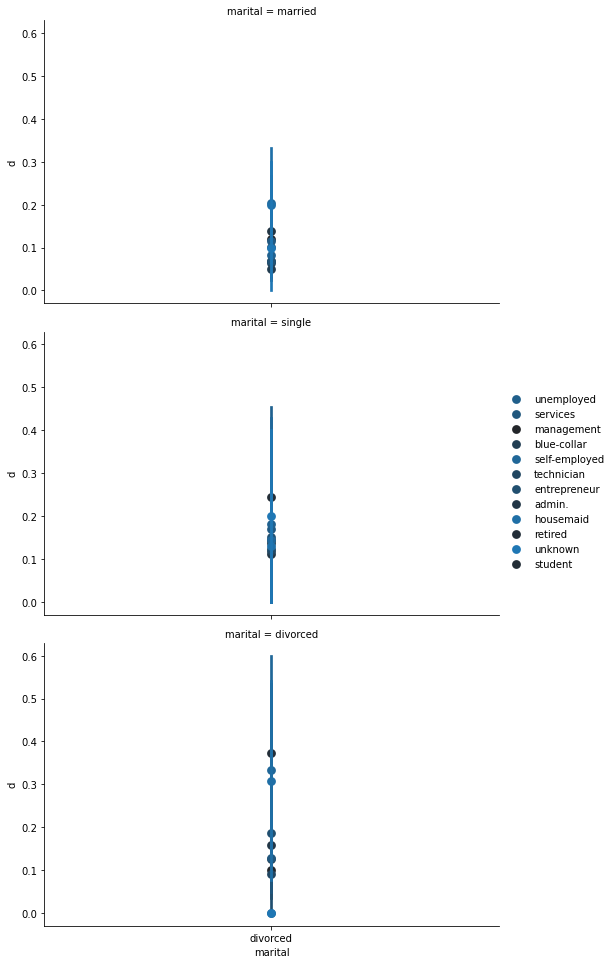

In [10]:
FacetGrid = sns.FacetGrid(df, row='marital', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'marital', 'd', 'job', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

In [ ]:
# Từ đồ thị trên có thể nhận xét: vì số ngừoi đồng ý tham gia (yes) ít hơn rất nhiều so với không tham gia (no)
# --> 

In [15]:
dec = {"no": 0, "yes": 1}
df["default_2"] = df["default"].map(dec)
df["default_2"]

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    1
4518    0
4519    0
4520    0
Name: default_2, Length: 4521, dtype: int64

<AxesSubplot:xlabel='default_2', ylabel='y'>

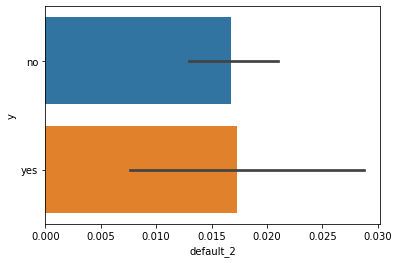

In [16]:
# sự phụ thuộc giữa thuộc tính này với thuộc tính quyết định.
sns.barplot(x='default_2', y='y', data=df)

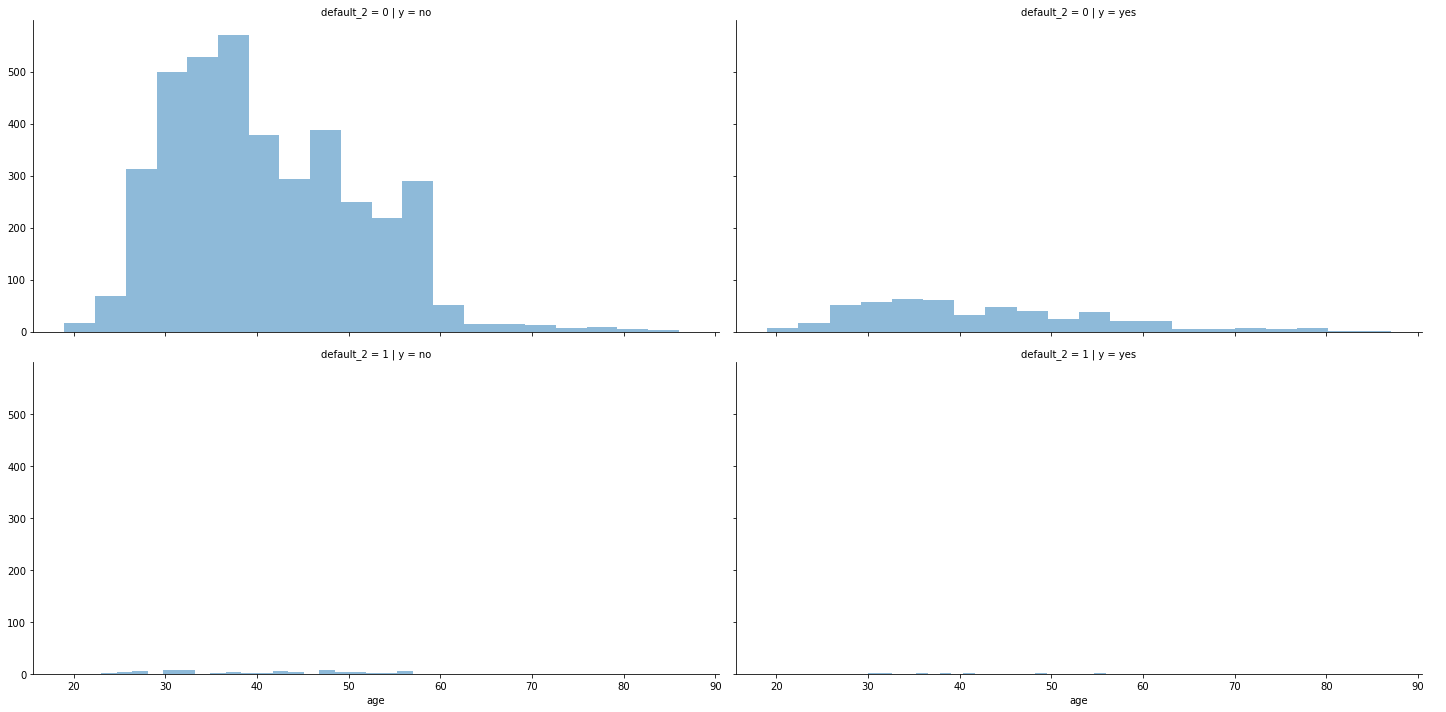

In [17]:
grid = sns.FacetGrid(df, col='y', row='default_2', height=5.0, aspect=2.0)
grid.map(plt.hist, 'age', alpha =.5, bins=20)
grid.add_legend();

In [18]:
# Thống kê số người đã có địa chỉ liên hệ trước khi tham gia
for dataset in [df]:
    dataset['contacts'] = dataset['previous'] 
    dataset.loc[dataset['contacts']>0, 'contact']=0
    dataset.loc[dataset['contacts']==0, 'contact']=1
    dataset['contact'] = dataset['contact'].astype(int)
df['contact'].value_counts()

1    3705
0     816
Name: contact, dtype: int64

In [ ]:
# outcome of the previous marketing campaign (categorical)
# previous: number of contacts performed before this campaign and for this client (numeric)

/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


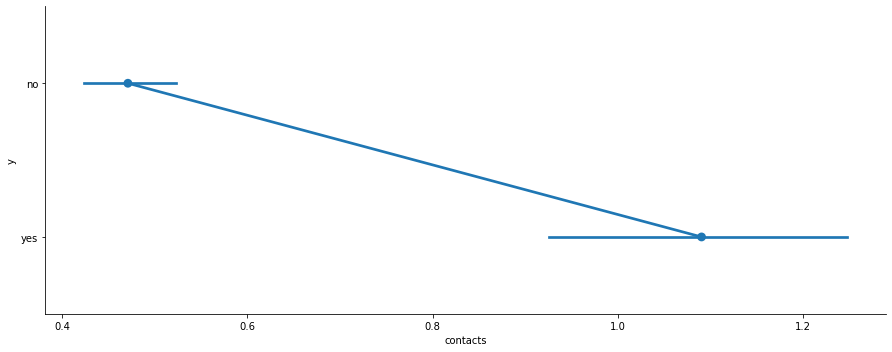

In [19]:
axes = sns.catplot('contacts', 'y',
                      data=df, aspect=2.5, kind='point', )

In [24]:
#6. Tiền xử lý dữ liệu

In [25]:
# Xoá đi các thuộc tính không cần thiết
df = df.drop(['poutcome'], axis=1)

In [22]:
#7. Biến đổi các thuộc tính

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   int64 
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  y          4521 non-null   object
 16  d          4521 non-null   int64 
 17  default_2  4521 non-null   int64 
 18  contacts   4521 non-null   int64 
dtypes: int64(11), object(8)
memory usage: 671.2+ KB


In [27]:
# Biểu diễn thuộc tính default (tín dụng) thành các giá trị 0 (no), 1 (yes)
credit = {"no": 0, "yes": 1}

for dataset in [df]:
    dataset['default'] = dataset['default'].map(credit)

In [29]:
# Biểu diễn thuộc tính loan (vay mượn) thành các giá trị 0 (no), 1 (yes)
loann = {"no": 0, "yes": 1}

for dataset in [df]:
    dataset['loan'] = dataset['loan'].map(loann)

In [30]:
# Chuyển đổi thuộc tính tuổi (age) về kiểu số nguyên và tạo ra các nhóm tuổi chia giá trị tuổi thành 8 nhóm nhỏ có số lượng hành khách tương đối đều nhau
# nhóm 1: dưới 18 tuổi (chưa có khả năng lao động)
# nhóm 2: từ 19 tuổi đến 60 tuổi (độ tuổi lao động)
# nhóm 3: trên 60 tuổi (độ tuổi về hưu)
for dataset in [df]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 18, 'age'] = 0
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 60), 'age'] = 1
    dataset.loc[ dataset['age'] > 60, 'age'] = 2

In [31]:
df['age'].value_counts()

1    4394
2     127
Name: age, dtype: int64

In [32]:
# tạo thuộc tính tuổi*campaign (age_campaign)
for dataset in [df]:
    dataset['age_campaign'] = dataset['age'] * dataset['campaign']

In [33]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,d,default_2,contacts,age_campaign
0,1,unemployed,married,primary,0,1787,no,0,1,19,oct,79,1,-1,0,no,0,0,0,1
1,1,services,married,secondary,0,4789,yes,1,0,11,may,220,1,339,4,no,0,0,4,1
2,1,management,single,tertiary,0,1350,yes,0,0,16,apr,185,1,330,1,no,0,0,1,1
3,1,management,married,tertiary,0,1476,yes,1,1,3,jun,199,4,-1,0,no,0,0,0,4
4,1,blue-collar,married,secondary,0,0,yes,0,1,5,may,226,1,-1,0,no,0,0,0,1
5,1,management,single,tertiary,0,747,no,0,0,23,feb,141,2,176,3,no,0,0,3,2
6,1,self-employed,married,tertiary,0,307,yes,0,0,14,may,341,1,330,2,no,0,0,2,1
7,1,technician,married,secondary,0,147,yes,0,1,6,may,151,2,-1,0,no,0,0,0,2
8,1,entrepreneur,married,tertiary,0,221,yes,0,1,14,may,57,2,-1,0,no,0,0,0,2
9,1,services,married,primary,0,-88,yes,1,0,17,apr,313,1,147,2,no,0,0,2,1
